In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = "paper", font = "monospace", font_scale=2)

# Define input training data and parameter

In [2]:
input_signal_num = 50000 # number of training data
input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
mean_w = 0.0 # mean of noise
std_w = 1.0 # std of noise
k = 0.2

# Define structure (all in one network)

In [3]:
# input x
x = tf.placeholder(tf.float32, [None, 1])
tmp_c = tf.placeholder(tf.float32, [None, 1])
disp = tf.placeholder(tf.float32, [None, 1])
# first neural network (encoder)
l11 = tf.layers.dense(inputs = x, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l12 = tf.layers.dense(inputs = l11, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l13 = tf.layers.dense(inputs = l12, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l14 = tf.layers.dense(inputs = l13, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of first neural network
u1 = tf.layers.dense(inputs = l14, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

# gaussian noise
w = tf.random_normal([input_signal_num, 1], mean=mean_w, stddev=std_w, dtype=tf.float32, seed=None)

# add u1 with gaussian noise
y = tf.add(tf.multiply(tf.add(u1, w),tmp_c), disp)

# second neural network (decoder)
l21 = tf.layers.dense(inputs = y, units = 512, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))
        
l22 = tf.layers.dense(inputs = l21, units = 256, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l23 = tf.layers.dense(inputs = l22, units = 128, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

l24 = tf.layers.dense(inputs = l23, units = 64, activation = tf.nn.relu, 
                    kernel_initializer = tf.random_normal_initializer(0.,.1), 
                    bias_initializer = tf.constant_initializer(0.1))

# output of second neural network
u2 = tf.layers.dense(inputs = l24, units = 1,  
                             kernel_initializer = tf.random_normal_initializer(0.,.1), 
                             bias_initializer = tf.constant_initializer(0.1))

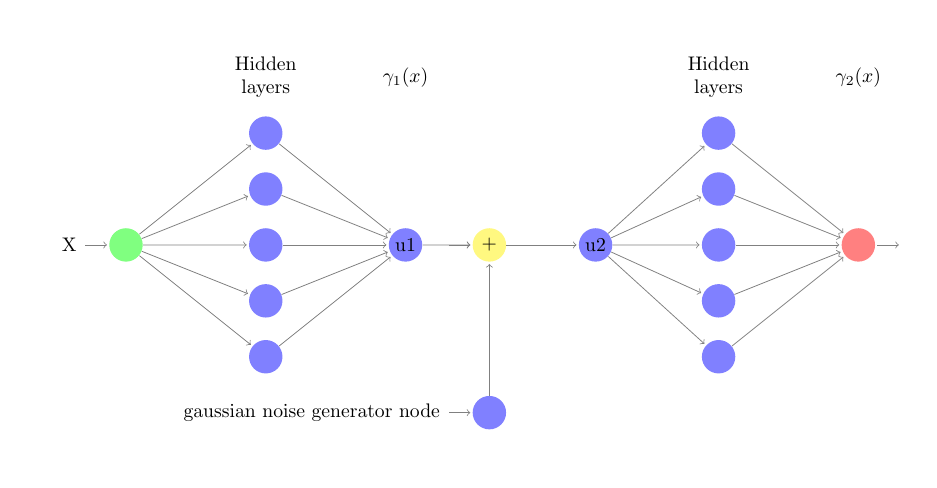

# Define loss function

In [4]:
loss = k * tf.reduce_mean(tf.square(u1 - x)) + tf.reduce_mean(tf.square(u2 - u1)) # k(u1-x)^2+(u2-u1)^2
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
x_axis = np.array([np.linspace(-15, 15, num=input_signal_num).tolist()]).T

# Before optimization with loss function

In [7]:
y_axis = sess.run(u1, feed_dict = {x:x_axis})

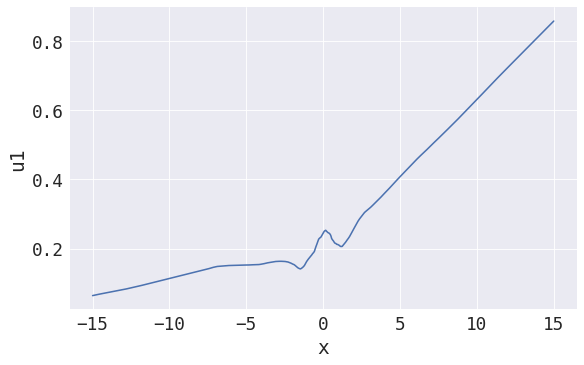

In [ ]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('u1')
plt.show()

# Optimization

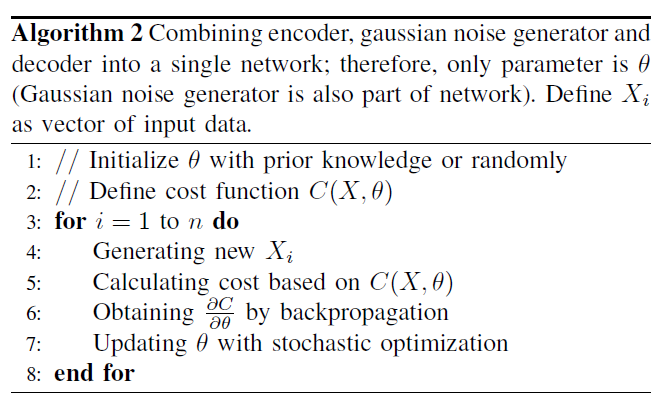

Iteration  0 : current loss: 156.011


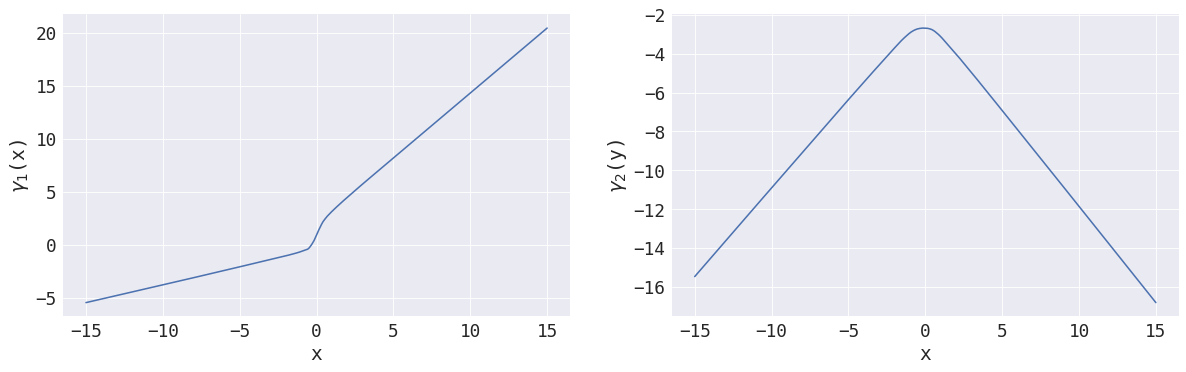

Iteration  100 : current loss: 0.968345


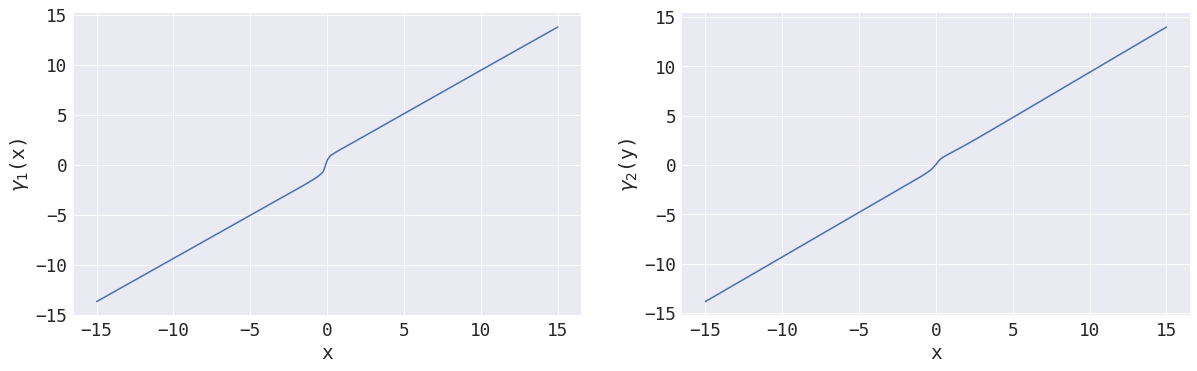

Iteration  200 : current loss: 0.948631


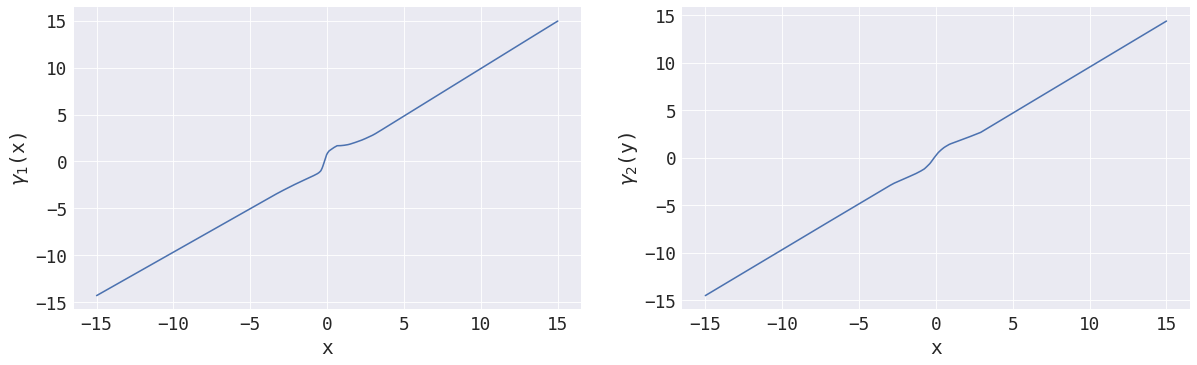

Iteration  300 : current loss: 0.849537


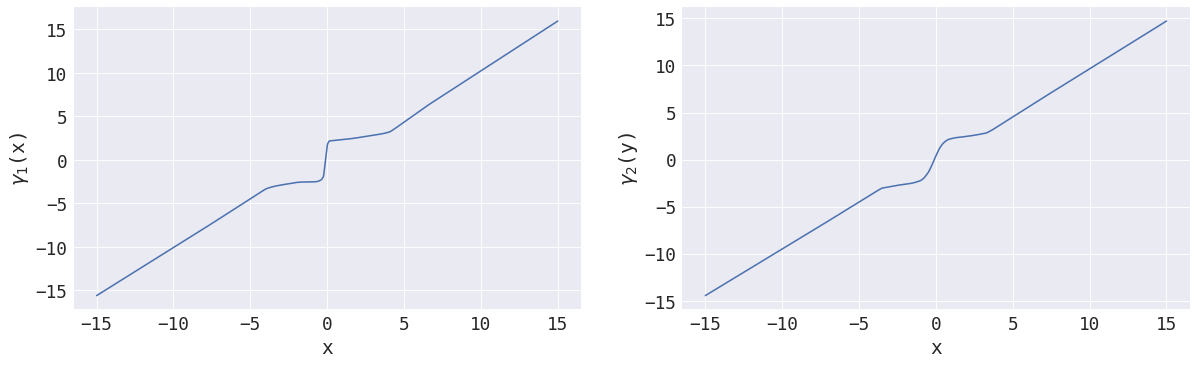

In [ ]:
for i in range(3000): #30000 add more iteration here
    input_data = 5*np.random.randn(input_signal_num, 1) # generate # of gaussian dist input
    feed_dict2 =  {x:input_data, tmp_c : np.array([[1]]), disp : np.array([[0]])}
    sess.run(optimizer, feed_dict2)
    if i % 100 == 0:
        print('Iteration ',i,': current loss:',sess.run(loss,feed_dict2))
        fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
        plt.subplot(1,2,1)
        y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('x')
        plt.ylabel('$\gamma_1$(x)')
        plt.subplot(1,2,2)
        y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
        plt.plot(x_axis[:,0],y_axis[:,0])
        plt.xlabel('x')
        plt.ylabel('$\gamma_2$(y)')
        plt.show()

# After optimization with loss func

In [ ]:
y_axis = sess.run(u1, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_1$(x)')
plt.show()
y_axis = sess.run(u2, feed_dict = {x:x_axis, tmp_c : np.array([[0]]), disp: x_axis})
plt.plot(x_axis[:,0],y_axis[:,0])
plt.xlabel('x')
plt.ylabel('$\gamma_2$(y)')
plt.show()